# Bioinformatics 2021: Week 4

### Working with BioPython

In [8]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [9]:
alignments = pairwise2.align.globalms("AGTCGATGCGATAGCCGTA", "AGTCGTGCGAAAGCCCTA", 2, -1.5, -1, -0.5)
print(format_alignment(*alignments[0]))

AGTCGATGCGATAGCCGTA
||||| |||||.||||.||
AGTCG-TGCGAAAGCCCTA
  Score=28



In [10]:
alignments[0].seqA, alignments[0].seqB, alignments[0].score

('AGTCGATGCGATAGCCGTA', 'AGTCG-TGCGAAAGCCCTA', 28.0)

### Working with trees

In [11]:
#!pip install dendropy

In [12]:
import dendropy

In [13]:
# https://dendropy.org/primer/trees.html#building-a-tree-programmatically

taxon_namespace = dendropy.TaxonNamespace(["A", "B", "C", "D"])
tree = dendropy.Tree(taxon_namespace=taxon_namespace)

ch1 = tree.seed_node.new_child()
ch1.edge.length = 1
ch2 = tree.seed_node.new_child(edge_length=3)

ch3 = dendropy.Node(edge_length=1)
ch4 = dendropy.Node(edge_length=2)
ch1.add_child(ch3)
ch1.add_child(ch4)

ch5 = dendropy.Node(edge_length=4)
ch6 = dendropy.Node(edge_length=5)

ch3.set_child_nodes([ch5, ch6])

# Assign taxa
ch2.taxon = taxon_namespace.get_taxon("A")
ch4.taxon = taxon_namespace.get_taxon("B")
ch5.taxon = taxon_namespace.get_taxon("C")
ch6.taxon = taxon_namespace.get_taxon("D")

In [14]:
# visual representation
print(tree.as_ascii_plot())

                                                                             /-------------------------------------- C
                                      /--------------------------------------+                                        
/-------------------------------------+                                      \-------------------------------------- D
|                                     |                                                                               
+                                     \----------------------------------------------------------------------------- B
|                                                                                                                     
\------------------------------------------------------------------------------------------------------------------- A
                                                                                                                      
                                                

In [15]:
# Newick format 
print(tree.as_string("newick"))

(((C:4,D:5):1,B:2):1,A:3);



### Working with numpy 

In [23]:
import numpy as np

In [24]:
arr = np.ndarray((3,3))
for i in range(3):
    for j in range(3):
        arr[i,j] = (i+1)+(j+1)*10

In [25]:
arr

array([[11., 21., 31.],
       [12., 22., 32.],
       [13., 23., 33.]])

### Tasks

In [ ]:
# Task 1: construct pairwise distance matrix for a list of sequences:
# - align two sequences
# - use hamming_distance

def distance_matrix_pairwise(seqs):
    dm = np.ndarray((len(seqs),len(seqs)))
    # your code
    
    return dm

# Example 1: pairwise_distance(["AA", "AC", "GC"]) -> 
#                                                    [[0,1,2],
#                                                     [1,0,1],
#                                                     [2,1,0]]

In [35]:
# Task 2: perform hierarchical clustering

def hierarchical_clustering(dm, taxa):
    taxon_namespace = dendropy.TaxonNamespace(taxa)
    tree = dendropy.Tree(taxon_namespace=taxon_namespace)
    # your code
    
    return tree

# Inputs:
# - NxN distance matrix for N objects
# - list of names for N objects

# Brief notes:
# - two nearest objects are joined into a cluster
# - the corresponding edge_length should be taken as their respective distance / 2
# - algorithm iterates until a signle root cluster is formed
# - distance between clusters should be calculated as mean pairwise distance 
#   between all objects in the 1st cluster and all objects in the 2nd cluster (or suggest your idea?)

In [37]:
# Task X: compare with scipy 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
# consider different methods

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 3.1622776601683795, 3.1622776601683795, 0.0],
  [0.0, 3.872983346207417, 3.872983346207417, 3.1622776601683795],
  [0.0, 5.744562646538029, 5.744562646538029, 3.872983346207417]],
 'ivl': ['C', 'D', 'A', 'B'],
 'leaves': [2, 3, 0, 1],
 'color_list': ['C1', 'C1', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1', 'C1']}

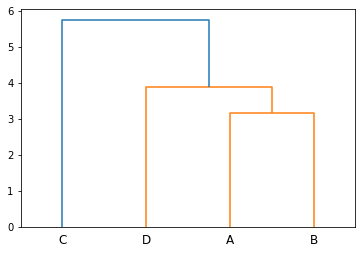

In [40]:
taxa = ["A", "B", "C", "D"]
dm = np.array([[0,1,4,3],
               [1,0,2,1],
               [4,2,0,5],
               [3,1,5,0]])
tr = linkage(pdist(dm))
dendrogram(tr, labels=taxa)